Note: Before using this analysis script, you need to extract the shapes from your image data. In this case [cellpose](https://github.com/MouseLand/cellpose) was used to do so.

# Import Libraries

In [1]:
import sys
from utils import FileReader, calculate_regionprops_table, drop_units, lineplot_over_time, boxplot, properties3D_table, properties2D_table
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

The following data structure is assumed:
1. filename.tif (image data)
2. filename_seg.npy (numpy ndarray containing the labels extracted from .tif-file using cellpose)

Note: The analysis script is unit aware. Space and time units are automatically retrieved from the .tif-Files. Therefore, the units must be specified before using ImageJ properties

#### Shape Data

In [2]:
# specify filepaths of your shape data
filepaths_labels = [
            Path(r"Data\WTwing_14.5hAPF-21hAPF-2_seg.npy"),
            Path(r"Data\WTwing_14.5hAPF-21hAPF-1_seg.npy"),
            Path(r"Data\WTwing_14.5hAPF-18hAPF-4_seg.npy")
            ]

In [3]:
# load shape data
labels_tuples = [FileReader.to_LayerDataTuple(filepath)[0] for filepath in filepaths_labels]

dim 1 has a scale of 0. This is unvalid for a napari layer. Scale will be forced to 1
dim 1 has a scale of 0. This is unvalid for a napari layer. Scale will be forced to 1
dim 1 has a scale of 0. This is unvalid for a napari layer. Scale will be forced to 1


#### Image Data

In [4]:
# if your image data has multiple channels, specify which which one to choose
image_channel = 0

In [5]:
# specify filepaths of your image data
filepaths_images = [
            Path(r"Data\WTwing_14.5hAPF-21hAPF-2.tif"),
            Path(r"Data\WTwing_14.5hAPF-21hAPF-1.tif"),
            Path(r"Data\WTwing_14.5hAPF-18hAPF-4.tif")
            ]

In [6]:
# load image data
image_tuples = [FileReader.to_LayerDataTuple(filepath)[image_channel] for filepath in filepaths_images]

dim 2 has a scale of 0. This is unvalid for a napari layer. Scale will be forced to 1
dim 2 has a scale of 0. This is unvalid for a napari layer. Scale will be forced to 1
dim 2 has a scale of 0. This is unvalid for a napari layer. Scale will be forced to 1


# Calculate Shape Features

The following shape properties can be calculated (click [here](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) for details). The properties vary depending if your shapes are 2D or 3D

In [7]:
properties2D_table

,size_properties,position_properties,region_properties,shape_properties,moment_properties,intensity_properties
0,area,centroid,bbox,euler_number,inertia_tensor,intensity_max
1,area_bbox,centroid_local,image,extent,inertia_tensor_eigvals,intensity_mean
2,equivalent_diameter_area,centroid_weighted,image_convex,feret_diameter_max,moments,intensity_min
3,area_filled,centroid_weighted_local,image_filled,axis_major_length,moments_central,
4,area_convex,,image_intensity,axis_minor_length,moments_normalized,
5,,,coords,orientation,moments_weighted,
6,,,slice,solidity,moments_weighted_central,
7,,,,aspect_ratio,moments_weighted_normalized,
8,,,,eccentricity,moments_hu,
9,,,,perimeter,moments_weighted_hu,


In [8]:
properties3D_table

,size_properties,position_properties,region_properties,shape_properties,moment_properties,intensity_properties
0,area,centroid,bbox,euler_number,inertia_tensor,intensity_max
1,area_bbox,centroid_local,image,extent,inertia_tensor_eigvals,intensity_mean
2,equivalent_diameter_area,centroid_weighted,image_convex,feret_diameter_max,moments,intensity_min
3,area_filled,centroid_weighted_local,image_filled,axis_major_length,moments_central,
4,,,image_intensity,axis_minor_length,moments_normalized,
5,,,coords,orientation,moments_weighted,
6,,,slice,solidity,moments_weighted_central,
7,,,,aspect_ratio,moments_weighted_normalized,


In [9]:
# if your movies have not the same length, it makes sense to to set the maximum FrameNumber used to the length of the shortest movie
max_FrameNumber = 21

In [10]:
# calculating properties
properties = ["area", "aspect_ratio", "orientation", "roundness", "circularity", "feret_diameter_max"]
df_list = [calculate_regionprops_table(labels_tuple, image_tuple = image_tuple, properties = properties,
                                       dimensionalized = True, exclude_boundary_labels = True)
           for labels_tuple, image_tuple in zip(labels_tuples, image_tuples)]
df = pd.concat(df_list)
df = df[df["FrameNumber"]<=max_FrameNumber]
df.head()

,area,orientation,feret_diameter_max,label,major_axis_length,minor_axis_length,perimeter,FrameNumber,GroupLabel,aspect_ratio,roundness,circularity
0,28.5696,-1.2641767560220705,7.879086241436883,16,7.052280827740523,5.408150047962782,21.87841845922842,0,WTwing_14.5hAPF-21hAPF-2_seg,1.304010,0.731400,0.750036
1,26.5728,-1.1281200135830083,7.164356216716196,17,6.931814152344438,5.2570861398348905,20.797240969167508,0,WTwing_14.5hAPF-21hAPF-2_seg,1.318566,0.704131,0.772033
2,26.521600000000003,-0.7612795119781759,7.5860925383230065,18,6.987166761359134,5.058444059448609,20.874885989045676,0,WTwing_14.5hAPF-21hAPF-2_seg,1.381288,0.691684,0.764824
3,25.8048,1.2847882431093727,7.696648621315644,20,7.5382456077645825,4.494083750657637,20.852144289248724,0,WTwing_14.5hAPF-21hAPF-2_seg,1.677371,0.578189,0.745777
4,34.688,-1.4466894945397537,9.181546710658287,21,8.314700670249039,5.54308728959853,24.333321779309635,0,WTwing_14.5hAPF-21hAPF-2_seg,1.500013,0.638846,0.736184


# Export Shape Features

You can export the shape features for further analysis using your software of choice

#### to Excel sheet (.xlsx-File)

In [11]:
df.pint.dequantify().to_excel("shape_features.xlsx")

#### or to .csv-File

In [12]:
df.pint.dequantify().to_csv("shape_features.csv")

# Analysis

## Plot shape features over time

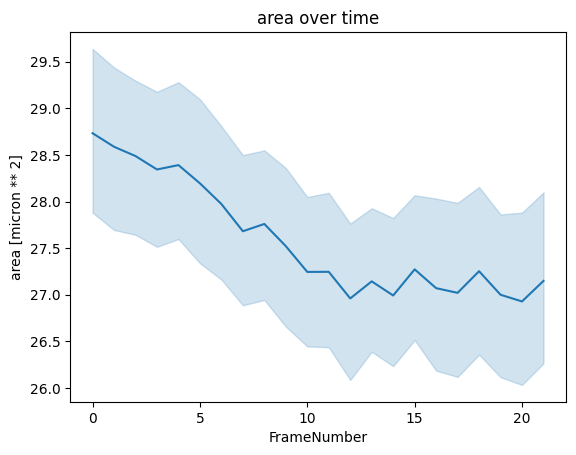

In [13]:
lineplot_over_time(df, "area")

## Use Boxplots

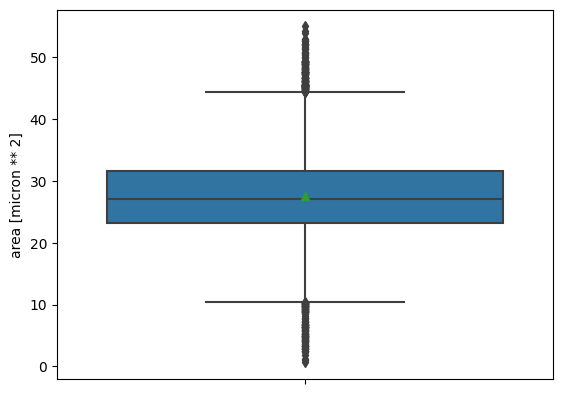

In [14]:
boxplot(df, "area", group_by = None)

## Save Figures

supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp\
supress the figure display by setting "show_figure = False"

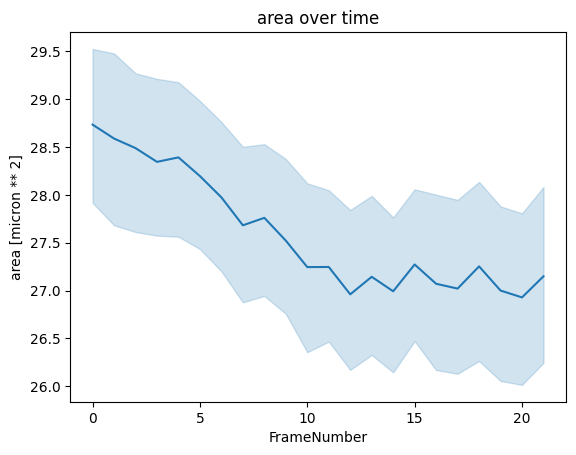

In [15]:
# save as png with 240 dots per inch
fig = lineplot_over_time(df, "area", return_figure = True)
plt.savefig("area_over_time.png", dpi=240)

In [16]:
# save as vector graphic
fig = lineplot_over_time(df, "area", return_figure = True, show_figure = False)
plt.savefig("area_over_time.svg")

## Compare multiple timepoints

In [17]:
# create a new DataFrame containg only the desired timepoints
attribute = "FrameNumber"
frame_numbers = [0,9,21]
df_list = [df[df["FrameNumber"]==frame_number] for frame_number in frame_numbers]
df_timepoints = pd.concat(df_list)
df_timepoints.head()

,area,orientation,feret_diameter_max,label,major_axis_length,minor_axis_length,perimeter,FrameNumber,GroupLabel,aspect_ratio,roundness,circularity
0,28.5696,-1.2641767560220705,7.879086241436883,16,7.052280827740523,5.408150047962782,21.87841845922842,0,WTwing_14.5hAPF-21hAPF-2_seg,1.304010,0.731400,0.750036
1,26.5728,-1.1281200135830083,7.164356216716196,17,6.931814152344438,5.2570861398348905,20.797240969167508,0,WTwing_14.5hAPF-21hAPF-2_seg,1.318566,0.704131,0.772033
2,26.521600000000003,-0.7612795119781759,7.5860925383230065,18,6.987166761359134,5.058444059448609,20.874885989045676,0,WTwing_14.5hAPF-21hAPF-2_seg,1.381288,0.691684,0.764824
3,25.8048,1.2847882431093727,7.696648621315644,20,7.5382456077645825,4.494083750657637,20.852144289248724,0,WTwing_14.5hAPF-21hAPF-2_seg,1.677371,0.578189,0.745777
4,34.688,-1.4466894945397537,9.181546710658287,21,8.314700670249039,5.54308728959853,24.333321779309635,0,WTwing_14.5hAPF-21hAPF-2_seg,1.500013,0.638846,0.736184


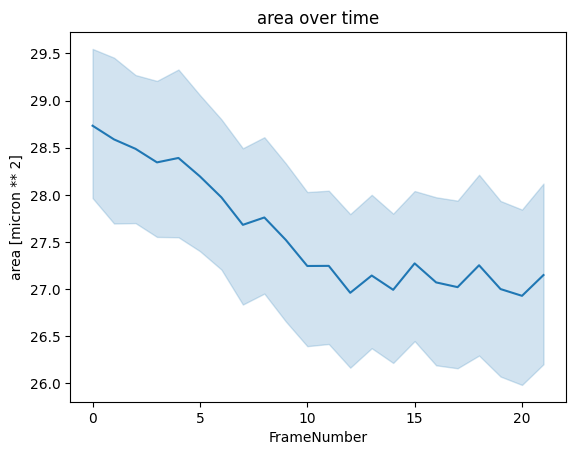

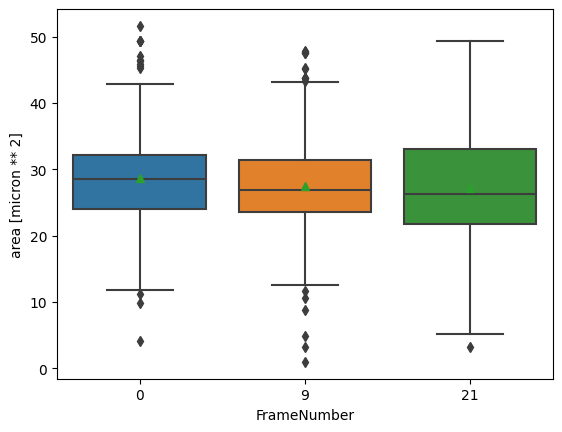

In [18]:
boxplot(df_timepoints, "area", group_by = "FrameNumber")

## Check for statistical significance

### Shapiro-Wilk-Test: check for normal distribution 

In [19]:
from scipy.stats import shapiro

In [20]:
df_noUnits = drop_units(df_timepoints) #drop units from data
shapiro(df_noUnits["area"])

ShapiroResult(statistic=0.9840619588565025, pvalue=3.0160856055970655e-08)

### Kruskal-Wallis test: check if all groups originate from the same distribution for non-parametric data 

In [21]:
from scipy.stats import kruskal

In [22]:
samples = [group["area"].to_numpy() for i, group in df_noUnits.groupby("FrameNumber")] #create groups containing the area data for FrameNumer == 0, FrameNumer == 9 and FrameNumer == 21
kruskal(*samples) # perform test

KruskalResult(statistic=7.741989213648188, pvalue=0.02083763386222053)

### Pairwise comparison using Mann-Whitney U test with Bonferroni correction

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 9: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.268e-01 U_stat=4.691e+04
9 vs. 21: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=4.697e+04
0 vs. 21: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.857e-02 U_stat=4.869e+04


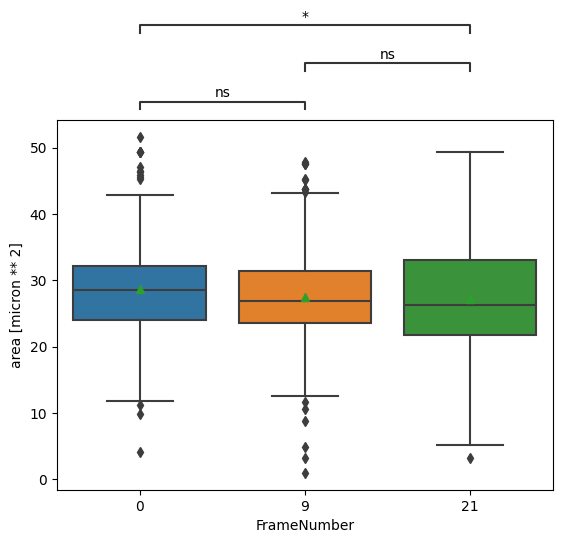

In [23]:
stats_dict = dict(test= 'Mann-Whitney',pairs= [(0,9),(9,21),(0,21)], comparisons_correction="Bonferroni", text_format= 'star', loc= 'outside')
boxplot(df_timepoints, "area", group_by = "FrameNumber", stats_dict=stats_dict)